# TESLA Stock Price Prediciton using Historical Stock Data and Sentiment Analysis

## Project Overview

To-Do:
Brief introduction to project, objectives and scope 
Describe problem statement, predicting stock prices, sentiment analysis and dataset used.

Layout of project like chapters

Also descriptions underneath each subtitle

Sort hashtags


## Data Acquisition and Preprocessing
To-Do: Describe sources from which you optain your data (yfinance and Twitter API), detail steps taken to collect and preprocess the data, data cleaning and handling missing values. Justify using only 2020 onwards.

Explain some stock data will have irregular trading days like holidays and stock splits and dividends can artifically change value  before returnign to normal(explain), sorted by yfinance and auto_adjust

- Data cleaning for future datasets (missing values, data type conversion, removing duplicates)

### Importing Libraries

In [33]:
pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
# Import timing
import time

# Data Collection and Preprocessing
import yfinance as yf
import pandas as pd
import datetime
import numpy as np

# Visualisation
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit

# Sentiment analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

### Acquiring Data

In [6]:
# Set display options to show four decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

# Download Tesla data using yfinance
ticker = 'TSLA'
# Auto_adjust set to true to account for stock splits and dividends
data = yf.download(ticker, auto_adjust=True)

# Convert downloaded data into a Pandas DataFrame
tsla_df = pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Start date for Tesla stock prices
start_date = '2020-01-01'

# End date for Tesla stock prices
end_date = pd.Timestamp(datetime.date.today())
end_date = '2021-01-01'
# End date for Tesla stock prices
# Select data from 01/01/2020 onwards
tsla_df = tsla_df.loc[start_date : end_date]

# Columns indicating price
price_columns = ['Open', 'High', 'Low', 'Close']

# Plot colours for Open, High, Low and Close respectively
price_colours = ['#828cf8', '#ef553b', '#00cc96', '#b983f8']

# Colour for volume plots
volume_colour = '#ffa500'

[*********************100%%**********************]  1 of 1 completed


In [7]:
tsla_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,28.3000,28.7133,28.1140,28.6840,142981500
2020-01-03,29.3667,30.2667,29.1280,29.5340,266677500
2020-01-06,29.3647,30.1040,29.3333,30.1027,151995000
2020-01-07,30.7600,31.4420,30.2240,31.2707,268231500
2020-01-08,31.5800,33.2327,31.2153,32.8093,467164500


In [8]:
tsla_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-24,214.3300,222.0300,213.6667,220.5900,68596800
2020-12-28,224.8367,227.1333,220.2667,221.2300,96835800
2020-12-29,220.3333,223.3000,218.3333,221.9967,68732400
2020-12-30,224.0000,232.2000,222.7867,231.5933,128538000
2020-12-31,233.3300,239.5733,230.3733,235.2233,148949700


## Exploratory Data Analysis

### Key Statistics

In [9]:
tsla_df.describe()

,Open,High,Low,Close,Volume
count,253.0000,253.0000,253.0000,253.0000,253.0000
mean,96.3695,99.0961,93.5660,96.6657,225923862.4506
std,55.8885,57.2343,54.4501,56.3319,120411185.0238
min,24.9800,26.9907,23.3673,24.0813,52073100.0000
25%,49.4560,51.6633,47.7407,49.9307,141403500.0000
50%,81.4320,81.8667,79.0400,80.5773,210766500.0000
75%,140.4633,143.5000,136.8600,140.4000,283636500.0000
max,233.3300,239.5733,230.3733,235.2233,914082000.0000


In [10]:
# Create a list of Box traces for Price columns 
price_box_traces = []

for i, column in enumerate(price_columns):
    price_box_traces.append(go.Box(y=tsla_df[column],
                                   name=column,
                                  marker=dict(color=price_colours[i])))

# Create the figure and add the traces
fig = go.Figure(data=price_box_traces)

# Update the layout
fig.update_layout(
    title='Box Plot of Tesla Stock Prices',
    yaxis_title='Value ($)'
)

# Show the plot
fig.show()

In [11]:
# Create Box trace for Volume
volume_box_trace = go.Box(y=tsla_df['Volume'],
                          name='Volume',
                         marker=dict(color=volume_colour))

# Create the figure and add the trace
fig = go.Figure(data=volume_box_trace)

# Update the layout
fig.update_layout(
    title='Box Plot of Tesla Volume',
    yaxis_title='Volume'
)

# Show the plot
fig.show()

GIVE A DESCRIPTION OF THE ABOVE VISUALISATION (volume generally simial rbut large outliers probably due to news events) compare to price changes

### Distributions

In [12]:
# Fetch data and labels for Price columns
price_data = [tsla_df[column] for column in price_columns]
group_labels = price_columns

# Create the figure and add data
fig = ff.create_distplot(price_data,
                         group_labels,
                         show_hist=False,
                         show_rug=False,
                         colors=price_colours
                        )

# Update the layout
fig.update_layout(
    title='Distribution of Tesla Stock Prices',
    xaxis_title='Value ($)'
    )

# Show the figure
fig.show()

DESCRIBE VALUE WITH DENSITY PLOT

In [13]:
# Fetch data and labels for Volume column
volume_data = [tsla_df['Volume']]
group_labels = ['Volume']

# Create the figure and add data
fig = ff.create_distplot(volume_data,
                         group_labels,
                         show_hist=False,
                         show_rug=False,
                         colors=[volume_colour]
                        )

# Update the layout
fig.update_layout(
    title='Distribution of Tesla Volume',
    xaxis_title='Volume'
    )

# Show the figure
fig.show()

EXPLAIN VISUALISATIONS

### Trends over Time

CHANGE TO SMA
EXPLAIN EMA AND EMA PARAMETERS AND ROLLING STANDARD DEVIATION AND EMA VS SMA BASED ON CLOSE

In [14]:
# Window size of 20 chosen for smooth but responsive EMA curve
# Rougly 20 trading days per month
window = 20

# Calculate the Exponential Weighted Moving Average
tsla_df['EMA'] = tsla_df['Close'].ewm(span=window, min_periods=window, adjust=False).mean()

# Calculate the rolling Standard Deviation
tsla_df['STD'] = tsla_df['Close'].rolling(window=window).std()

# Create the traces for the Candlestick Plot
candlestick_trace = go.Candlestick(x=tsla_df.index,
                                   open=tsla_df['Open'],
                                   high=tsla_df['High'],
                                   low=tsla_df['Low'],
                                   close=tsla_df['Close'],
                                   name='Candlestick')

# Create the trace for the EMA Line Plot
ema_trace = go.Scatter(x=tsla_df.index,
                       y=tsla_df['EMA'],
                       mode='lines',
                       name='EMA',
                       line=dict(color='blue'))

# Create the trace for the Standard Deviation Line Plot
std_trace = go.Scatter(x=tsla_df.index,
                       y=tsla_df['STD'],
                       mode='lines',
                       name='Standard Deviation',
                       line=dict(color='purple'))

# Create subplots to plot Standard Deviation on the same x-axis but 
# a different plot to the Candlestick Chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add the relevant traces to the correct subplot
fig.add_trace(candlestick_trace, row=1, col=1)

fig.add_trace(ema_trace, row=1, col=1)

fig.add_trace(std_trace, row=2, col=1)

# Update the layout
fig.update_yaxes(title_text="Price", row=1, col=1)

fig.update_yaxes(title_text="STD", row=2, col=1, secondary_y=True)

fig.update_layout(title='Candlestick Chart of Tesla Stock with EMA and Rolling Standard Deviation',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()


EXPLAIN VISUALISATION

In [15]:
# Window size of 25 chosen for smooth but responsive SMA curve
window = 25

# Calculate the Simple Moving Average
tsla_df['Volume_SMA'] = tsla_df['Volume'].rolling(window=window).mean()

# Calculate the rolling Standard Deviation
tsla_df['Volume_STD'] = tsla_df['Volume'].rolling(window=window).std()

# Create the trace for the Volume Line Plot
volume_trace = go.Scatter(x=tsla_df.index,
                       y=tsla_df['Volume'],
                       mode='lines',
                       name='Volume',
                       line=dict(color=volume_colour))

# Create the trace for the Volume SMA Line Plot
volume_sma_trace = go.Scatter(x=tsla_df.index,
                            y=tsla_df['Volume_SMA'],
                            mode='lines',
                            name='Simple Moving Average',
                            line=dict(color='blue'))

# Create the trace for the Volume Standard Deviation Line Plot
volume_std_trace = go.Scatter(x=tsla_df.index,
                             y=tsla_df['Volume_STD'],
                             mode='lines',
                             name='Standard Deviation',
                             line=dict(color='purple'))

# Create subplots to plot Standard Deviation on the same x-axis but 
# a different plot to the Volume Line Plot
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add the relevant traces to the correct subplot
fig.add_trace(volume_trace, row=1, col=1)

fig.add_trace(volume_sma_trace, row=1, col=1)

fig.add_trace(volume_std_trace, row=2, col=1)

# Update the layout
fig.update_yaxes(title_text="Price", row=1, col=1)

fig.update_yaxes(title_text="STD", row=2, col=1, secondary_y=True)

fig.update_layout(title='Tesla Volume Over Time Plot with Simple Moving Average and Rolling Standard Deviation',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()

EXPLAIN VISUALISATIONS
CHANGE SMA TO VMA

### Correlations among Variables

In [16]:
# Define the correlation matrix
correlation_matrix = tsla_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

correlation_matrix

,Open,High,Low,Close,Volume
Open,1.0000,0.9987,0.9984,0.9972,-0.3655
High,0.9987,1.0000,0.9981,0.9989,-0.3472
Low,0.9984,0.9981,1.0000,0.9984,-0.3838
Close,0.9972,0.9989,0.9984,1.0000,-0.3605
Volume,-0.3655,-0.3472,-0.3838,-0.3605,1.0000


EXPLAIN CORRELATIONS AND HOW THEY RELATE TO TRAINING (i.e. WHY THEY ARE ALL INCLUDED)

## Feature Engineering

## Model Selection and Training

EXPLAIN SVR AND RBF KERNEL
EXPLAIN WINDOW_SIZE, I.E. HOW MANY DAYS USED TO PREDICT THE FOLLOWING DAY
WINDOW SIZE 5 MEANS USE 5 DAYS OF DATA AND PREDICT THE 6TH DAY
ALSO EXPLAIN TIME SERIES SPLIT
 We split the data into equal parts based on the number of splits
 i.e. if we have 100 data points and n_splits = 5:
 - the first fold will use the first 20 data points as the training set
   and the next 20 data points as the test set
 - the second fold will use the first 40 data points as the training set
   and the next 20 data points as the test set
 - Third fold will use the first 60 data points as the training set and
   the next 20 data points as the test and so forth

In [17]:
# Creates a sliding window dataset. 
# X contains the input features
# y contains the target values
# dates contains the dates used for target variables for plotting

# Parameters:
#   - data (dataframe): the dataframe containing historical stock data
#                       columns: ['Open', 'High', 'Low', 'Close', 'Volume']
#   - window_size:  number of days used to predict the next day's closing price
def create_dataset(data, window_size):
    X, y, dates = [], [], []
    for i in range (len(data) - window_size):
        # Append window_size number of values from all 5 features
        X.append(data.iloc[i : i + window_size, :].values.flatten())
        # Append the close value from the day after the rolling window
        y.append(data.iloc[i + window_size, 3])
        # Append the test dates for plotting purposes
        dates.append(data.index[i + window_size])
    return np.array(X), np.array(y), np.array(dates)

In [18]:
# EXPLAIN THIS 
# FIX SO IT TAKES IN X AND Y
def rbf_kernel(x_i,x_j,sigma2,ell2):
    if x_j is None:
        d = cdist(x_i, x_i)
    else:
        d = cdist(x_i, x_j)
    K = sigma2*np.exp(-np.power(d, 2)/ell2)
    return K

In [19]:
# Calcualtes Mean Absolute Error. This is the average of the absolute
# differences between predicted and actual values. It provides average
# error in the original units.

# Parameters:
#   - y (list): observed (test) values
#   - y_hat (list): predicted values 

def calculate_mae(y, y_hat):
    absolute_difference = [abs(y_hat[i] - y[i]) for i in range(len(y))]
    mae = sum(absolute_difference)/len(y)
    return mae

In [20]:
# Calculates Mean Squared Error. This is the average of the squared 
# differences between predicted and actual values. Penalizes large
# errors.

# Parameters:
#   - y (list): observed (test) values
#   - y_hat (list): predicted values 

def calculate_mse(y, y_hat):
    squared_difference = [(y[i] - y_hat[i]) ** 2 for i in range(len(y))]
    mse = sum(squared_difference)/len(y)
    return mse

In [21]:
# ADD ASSERT SHAPE = SHAPE


window_size = 1

# Create the sliding window dataset
X, y, dates = create_dataset(tsla_df[['Open', 'High', 'Low', 'Close', 'Volume']], window_size)
# Split the X and y dataset into training/test data on a 80/20 split
split = int(0.8 * len(X))

# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Split the input features into training and test data
X_train_scaled, X_test_scaled = X[: split], X[split :]
# Split the target values into training and test data
y_train, y_test = y[: split], y[split :]
# Retrieve the dates corresponding to the test data
dates_test = dates[split :]

# Train SVR Model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate MAE
mae = calculate_mae(y_test, predictions)
print("Mean Absolute Error: ", round(mae, 2))

# Calculate MSE
mse = calculate_mse(y_test, predictions)
print("Mean Squared Error: ", round(mse, 2))

# Create the trace for the actual values
actual_trace = go.Scatter(
    x=dates_test,
    y=y_test,
    mode='lines',
    name='Actual Values',
    marker=dict(color='#ff6361')
)

# Create the trace for the predicted values
predicted_trace = go.Scatter(
    x=dates_test,
    y=predictions,
    mode='lines',
    name='Predicted Values',
    marker=dict(color='#003f5c')
)

# Create the layout
layout = go.Layout(
    title='Actual vs Predicted Closing Prices',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Closing Price')
)

# Create the figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Show the plot
fig.show()

Mean Absolute Error:  114.35
Mean Squared Error:  14379.23


In [22]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of splits (folds) for time series cross-validation
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

# Lists to store evaluation metrics
mae_scores = []
mse_scores = []

# Iterate over time series cross-validation folds
for train_index, test_index in tscv.split(X_scaled):
    # Split the input features into training and test data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    # Split the target values into training and test data
    y_train, y_test = y[train_index], y[test_index]
    # Get the dates for the test data
    dates_test_fold = dates[test_index]
    # Train SVR Model
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate MAE per fold
    mae = calculate_mae(y_test, predictions)
    mae_scores.append(mae)

    # Calculate MSE per fold
    mse = calculate_mse(y_test, predictions)
    mse_scores.append(mse)

    # Create the trace for the actual values
    actual_trace = go.Scatter(
        x=dates_test_fold,
        y=y_test,
        mode='lines',
        name='Actual Values - Fold {}'.format(len(mae_scores)),
        marker=dict(color='#ff6361')
    )

    # Create the trace for the predicted values
    predicted_trace = go.Scatter(
        x=dates_test_fold,
        y=predictions,
        mode='lines',
        name='Predicted Values - Fold {}'.format(len(mae_scores)),
        marker=dict(color='#003f5c')
    )

    # Create the layout
    layout = go.Layout(
        title='Actual vs Predicted Closing Prices - Fold {}'.format(len(mae_scores)),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Closing Price')
    )

    # Create the figure
    fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

    # Show the plot
    fig.show()


# Calculate the average MAE from all folds
print("Mean MAE: ", round(np.mean(mae_scores), 2))
# Calculate the average MSE from all folds
print("Mean MSE: ", round(np.mean(mse_scores), 2))

Mean MAE:  36.23
Mean MSE:  2547.58


SVM: Try grid saerch, different kernels, along with justificaiton of window_size and date range
    try other models like lstm and fiddle with window_size, 
 Interpret results, analyse feature importance, model coefficients and insights

## Sentiment Analysis

In [23]:
# EXPLAIN CHOICE TO NOT INCLUDE NUMBERS
# EXZPLAIN POS TAGGING

### Tweet Cleaning

In [24]:
def clean_text(text,
               remove_mentions=True,
               remove_hashtags=True,
               remove_tickers=True,
               remove_hyperlinks=True,
               remove_special_characters=True):
    
    # Define regex patterns for mentions, hashtags, tickers, hyperlinks
    # and special characters
    mention_pattern = r'@\w+' # Matches mentions starting with '@'
    hashtag_pattern = r'#\w+' # Matches hashtags starting with '#'
    ticker_pattern = r'\$\w+' # Matches tickers starting with '$'
    hyperlink_pattern = r'https?://\S+' # Matches hyperlinks starting with 'http'
    special_character_pattern = r'[^a-zA-Z\s]' # Matches special characters
    
    # Apply specified cleaning operations
    if remove_mentions:
        text = re.sub(mention_pattern, '', text)
    if remove_hashtags:
        text = re.sub(hashtag_pattern, '', text)
    if remove_tickers:
        text = re.sub(ticker_pattern, '', text)
    if remove_hyperlinks:
        text = re.sub(hyperlink_pattern, '', text)
    if remove_special_characters:
        text = re.sub(special_character_pattern, '', text)
        
    return text

In [25]:
def remove_stopwords(text):
    
    # Get English stop words
    stop_words = set(stopwords.words('english'))
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words and lowercase words
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    
    return filtered_words

In [26]:
def remove_words(filtered_words):
    # Specify words to remove
    # q left over from words like '19q4'
    # 'tsla' and 'tesla' not needed
    words_to_remove = ['q', 'tsla', 'tesla']
    
    filtered_words = [word for word in filtered_words if word not in words_to_remove]
    return filtered_words

In [27]:
def lemmatize_words(filtered_words):
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tag parts of speech for each word
    tagged_words = nltk.pos_tag(filtered_words)

    # Lemmatizer only works with WordNet POS tags
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN # assume deafult is noun
        
    # Lemmatize each word using its POS tag
    lemmatized_words = []
    for word, tag in tagged_words:
        pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemma)
        
    lemmatized_text = ' '.join(lemmatized_words)
        
    return lemmatized_text

In [28]:
# Download NLTK stop words list
#nltk.download('stopwords')
# Download the punkt tokenizer
#nltk.download('punkt')
# Download averaged perceptron tagger for part-of-speech tagging
#nltk.download('averaged_perceptron_tagger')
# Download the wordnet that organizes words based on semantic relationships
#nltk.download('wordnet')

In [29]:
df_tweet = pd.read_csv("tsla-tweets.csv", usecols=['date', 'tweet', 'retweets_count'])
df_tweet.head()

,date,tweet,retweets_count
0,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2
1,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0
2,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0
3,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15
4,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0


In [30]:
# Start the timer
start_time = time.time()

# Apply cleaning, removal of stopwords and lemmatization to each row
df_tweet['cleaned_tweet'] = df_tweet['tweet'].apply(lambda x: clean_text(x))
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: remove_stopwords(x))
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: remove_words(x))
df_tweet['cleaned_tweet'] = df_tweet['cleaned_tweet'].apply(lambda x: lemmatize_words(x))

# End the timer
end_time = time.time()

# Calculate time taken in minutes
execution_time = (end_time - start_time)/60

print("Execution time: ", execution_time, 'minutes')
df_tweet.head()

Execution time:  2.6394748131434125 minutes


,date,tweet,retweets_count,cleaned_tweet
0,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,fun fact audi registered etrons netherlands su...
1,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,mf stock watch shit go damn year miss curve
2,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,june th within day low reply teslacharts never...
3,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,gain momentum taiwan
4,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,extrapolate number another two year consider m...


### Exploratory Tweet Data Analysis

In [31]:
# Join all cleaned tweets together
all_words = ' '.join(df_tweet['cleaned_tweet']).split()

# Calculate word frequency
word_freq = Counter(all_words)

# Get the most common words and their frequencies
common_words = word_freq.most_common()

# Convert the list of tuples into a dataframe
common_words_df = pd.DataFrame(common_words, columns = ['Word', 'Frequency'])
common_words_df.head()

,Word,Frequency
0,stock,11793
1,get,8505
2,go,8173
3,day,7391
4,buy,7391


In [32]:
# Get the top 20 most popular words and their frequencies
top_words = common_words_df['Word'][:20]
word_frequencies = common_words_df['Frequency'][:20]

# Create the bar plot
fig = go.Figure(data=[go.Bar(x=top_words, y=word_frequencies)])

# Update the layout
fig.update_layout(
    title="Top 20 Most Popular Words",
    xaxis_title='Word',
    yaxis_title='Frequency',
    xaxis=dict(type='category')
)

fig.show()

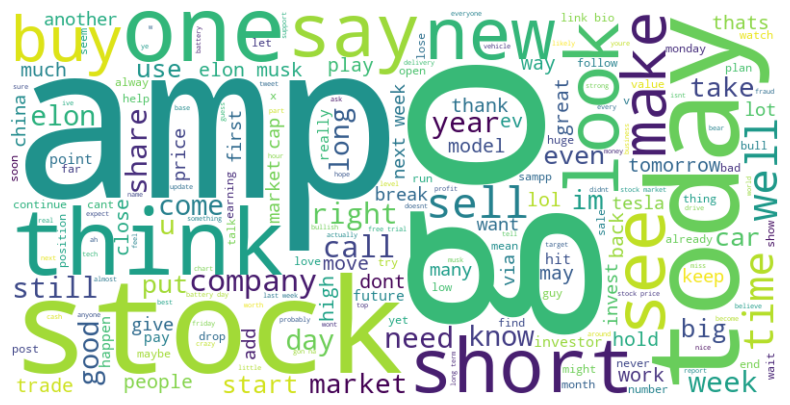

In [35]:
# Join tweets together
wordcloud_words = ' '.join(df_tweet['cleaned_tweet'])

# Generate the word cloud from the all words variable
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()